# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Harah```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

print df

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  2.0    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
df.info()

# ...or...

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
df.iloc[:3]

# or equivalently

df.head(3)

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df.loc[:, ['animal', 'age']]

# or

df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df[df['visits'] > 3] 

#or...

df[df['visits'] >= 3] 

#empty table is also fine!

,age,animal,priority,visits
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,2.0,cat,no,3


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
df[df['age'].isnull()]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df[df['age'].between(2, 4)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df.loc['f', 'age'] = 1.5

```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
print df['visits'].sum()
print np.sum(df['visits'])

19
19


```Calculate the mean age for each different animal in `df`.```

In [0]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
df.loc['k'] = [5.5, 'dog', 'no', 2]

# and then deleting the new row...

df = df.drop('k')

```Count the number of each type of animal in `df`.```

In [0]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
j,3.0,dog,no,1
b,3.0,cat,yes,3
a,2.5,cat,yes,1
f,1.5,cat,no,3
c,0.5,snake,no,2
h,NaN,cat,yes,1
d,NaN,dog,yes,3


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
df['animal'] = df['animal'].replace('snake', 'python')

```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
import numpy as np
df = pd.DataFrame(zip(np.random.randint(20, 65, 100), np.clip(np.random.normal(0.5, 0.3, 100), 0, 1),\
                 np.random.randint(150, 200, 100)/100.0), columns = ['age', 'skill', 'height'])

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
df['salary'] = df.apply(lambda x: 1000*((x['age']**2)/100 + 1.7*x['skill'] + 0.4*np.exp(-(x['height']-1.7)**2)), axis = 1)

```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
data = df.groupby([pd.Series(df.age.values/10), 'age']).agg({"age":{'number_of_rows': len}, 'salary':{'mean_salary': lambda x: np.mean(x)}, 'height': {'max_height': max}})
data.columns = data.columns.droplevel(0)
print(data)

        mean_salary  number_of_rows  max_height
  age                                          
2 20    5183.715507               2        1.71
  21    5230.736122               1        1.69
  22    6849.154844               1        1.54
  24    6697.045305               2        1.69
  25    8273.122891               1        1.67
  26    8041.493041               1        1.78
  27    8401.734203               1        1.86
  28    9518.400161               2        1.98
  29    9904.589496               4        1.92
3 31   10073.488039               1        1.65
  32   11886.650697               3        1.81
  33   12876.861870               1        1.98
  34   12843.762436               2        1.87
  35   13615.282215               4        1.71
  37   15527.326744               1        1.78
  38   15289.424060               3        1.98
  39   16328.367567               2        1.87
4 40   17346.006124               4        1.94
  41   18419.061865               3     

/usr/local/lib/python2.7/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


```Now split the dataframe to groups by age. for each group compute the mean salary, split by the sum of heights.```

In [0]:
data = df.groupby(['age']).apply(lambda x: pd.Series(np.mean(x['salary']/np.sum(x['height'])), index = ['val']))
#print(data)
df3 = df.groupby(['age']).agg(lambda x: (x['salary'].mean())/(x['height'].sum())).iloc[:,0]
print(df3)

age
20     1614.864644
21     3095.110131
22     4447.503146
24     2017.182321
25     4953.965803
26     4517.692720
27     4517.061399
28     2538.240043
29     1373.729472
31     6105.144266
32     2335.294832
33     6503.465591
34     3680.161156
35     2110.896467
37     8723.217272
38     2810.555893
39     4625.599877
40     2485.101164
41     3632.951058
43     3834.833657
44     2456.296012
45     4385.283402
46     6423.398825
47    12239.651618
48    13589.289924
49     3551.192880
50     5154.567137
51     4966.950474
52     2687.071072
53     5765.259961
54    19640.825812
55     6223.756445
56     4905.987378
57     5963.517918
58     4925.869308
59    21349.478273
60     7112.055371
61    10173.041077
62    11011.047489
63    21537.456629
64     7412.758392
Name: skill, dtype: float64


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

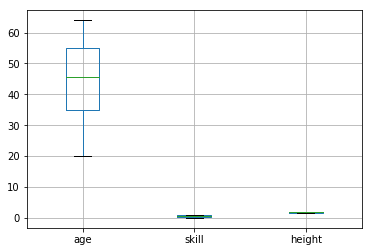

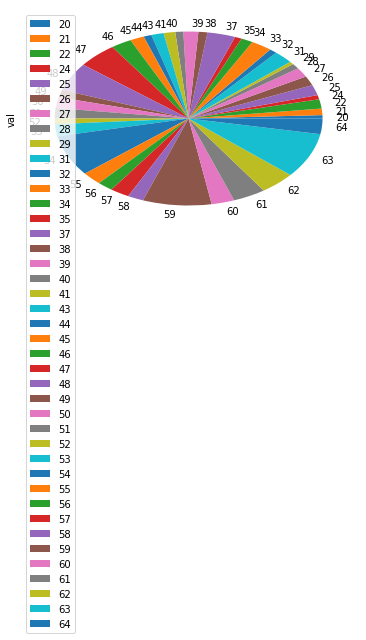

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
df[['age', 'skill', 'height']].boxplot()
data.plot(kind = 'pie', subplots=True)
plt.show()

```Save the result as a csv```

In [0]:
data.to_csv("data.csv")

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')
pd.options.display.max_columns=50

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add it a title. Answer the following questions (try using a single line of code for each):```
```
1 What is oldest house in the dataset (YearBuilt)?
2 What is the highest price (SalePrice) of houses built in that year?
3 What is the mean area (LotArea) of houses?
4 What is the 50-percentile of the area (LotArea) of houses?
5 What is more common: having a fireplace (Fireplaces) in the house, or not having one?
6 Wat is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
7 How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
8 What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
9 For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
10 Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is divided by 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

# oldest year: 1872
1 Id of oldest house: 1349    1350
Name: Id, dtype: int64
2 max price in this year: 122000
3 mean area: 10516.8280822
4 median area: 9478.5
5 having fireplaces
6 mean price of houses with pools: 288138.571429


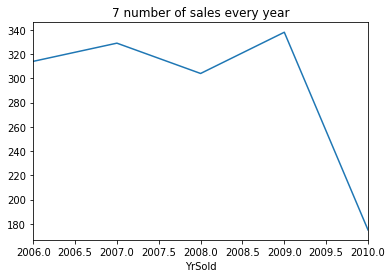

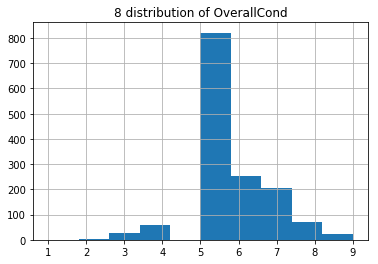

9


,FullBath,YearBuilt,SalePrice
Fireplaces,,,
0,4,54.781159,141331.482609
1,4,39.150769,211843.909231
2,4,54.347826,240588.539130
3,2,38.400000,252000.000000


10


OverallQual                        
                   min max      mean       std
MSSubClass                                    
False                3  10  5.556180  1.193055
True                 4   9  6.389908  1.111021

In [0]:
print '# oldest year: {0}'.format(min(df['YearBuilt']))
print '1 Id of oldest house: {0}'.format(df[df['YearBuilt'] == min(df['YearBuilt'])]['Id'])

print '2 max price in this year: {0}'.format(max(df[df['YearBuilt'] == min(df['YearBuilt'])]['SalePrice']))

print '3 mean area: {0}'.format(df['LotArea'].mean())

print '4 median area: {0}'.format(df['LotArea'].median())

print {True:'5 having fireplaces', False:'not having fireplaces'}.get(sum(df['Fireplaces']>0) >= sum(df['Fireplaces']==0))

print '6 mean price of houses with pools: {0}'.format(df[df['PoolArea']>0]['SalePrice'].mean())

df.groupby('YrSold').count().sort_index().rename(columns={'MSSubClass':'count'})['count'].plot(title = '7 number of sales every year')
plt.show()

df['OverallCond'].hist()
plt.title('8 distribution of OverallCond')
plt.show()

print '9'
display(df.groupby('Fireplaces').agg({'SalePrice':np.mean, 'YearBuilt':lambda x:2019-np.mean(x), 'FullBath':lambda x: len(set(x))}))

print '10'
display(df[df['MSSubClass']>60].groupby(df['MSSubClass']%20==0).agg({'OverallQual':[min, max, np.mean, np.std]}))

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,Inside
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,FR2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,Inside
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,Corner
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,FR2
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000,Inside
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,Inside
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,Corner
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900,Inside
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000,Corner


```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df['LotArea_m2'] = df['LotArea']/10.76
df['1_2stFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['GarageArea_sqrt'] = df['GarageArea']**0.5
df['area_to_bedroomAbvGr'] = df['LotArea']/(df['BedroomAbvGr']+1)
df['LotArea_to_mean_per_year'] = (df['LotArea']/
                                  (df.merge(df.groupby('YearBuilt').agg({'LotArea':np.mean}).reset_index()
                                           .rename(columns={'LotArea':'mean_area'}), on=['YearBuilt'])['mean_area']+1e-5))
features_1_hot = pd.get_dummies(df['LotConfig'], prefix='LotConfig')
df = pd.merge(df, features_1_hot, left_index=True, right_index=True)

features_list = ['LotArea_m2', '1_2stFlrSF', 'GarageArea_sqrt', 'area_to_bedroomAbvGr', 'LotArea_to_mean_per_year'] + list(features_1_hot.columns)

df[features_list]

,LotArea_m2,1_2stFlrSF,GarageArea_sqrt,area_to_bedroomAbvGr,LotArea_to_mean_per_year,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,785.315985,1710,23.409400,2112.500000,0.874874,0,0,0,0,1
1,892.193309,1262,21.447611,2400.000000,0.993940,0,0,1,0,0
2,1045.539033,1786,24.657656,2812.500000,1.164773,0,0,0,0,1
3,887.546468,1717,25.337719,2387.500000,0.988763,1,0,0,0,0
4,1325.278810,2198,28.913665,2852.000000,1.476415,0,0,1,0,0
5,1311.802974,1362,21.908902,7057.500000,1.461402,0,0,0,0,1
6,937.174721,1694,25.219040,2521.000000,1.044051,0,0,0,0,1
7,964.869888,2090,22.000000,2595.500000,1.074904,1,0,0,0,0
8,568.773234,1774,21.633308,2040.000000,0.633637,0,0,0,0,1
9,689.591078,1077,14.317821,2473.333333,0.768233,1,0,0,0,0


## Simple linear model

```Next, we will train a simple linear model, as seen in class. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
X = df[features_list]
Y = df['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7)

x_scaler = StandardScaler()
x_scaler.fit(X_train)
X_train = x_scaler.transform(X_train)
X_test = x_scaler.transform(X_test)

y_scaler = StandardScaler()
y_scaler.fit(Y_train)
Y_train = y_scaler.transform(Y_train)
Y_test = y_scaler.transform(Y_test)

model = LinearRegression()
model.fit(X_train, Y_train)
print 'train rmse: {0}'.format(mean_squared_error(Y_train, model.predict(X_train))**0.5)
print 'test rmse: {0}'.format(mean_squared_error(Y_test, model.predict(X_test))**0.5)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


ValueError: ignored

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regolarized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('house_prices_special.csv')

In [0]:
X = df.drop(['SalePrice'], axis=1)

lister = []
for i in range(2,4):
    lister.append(X.copy().rename(columns={col:col+'_'+str(i) for col in X.columns})**i)
X = pd.concat([X]+lister, axis=1)


Y = df['SalePrice']

X_train, X_test, Y_train, Y_test, index_train, index_test = train_test_split(X,Y,X.index, train_size = 0.7)

x_scaler = StandardScaler()
x_scaler.fit(X_train)
X_train = x_scaler.transform(X_train)
X_test = x_scaler.transform(X_test)

y_scaler = StandardScaler()
y_scaler.fit(Y_train)
Y_train = y_scaler.transform(Y_train)
Y_test = y_scaler.transform(Y_test)

model = LinearRegression()
model.fit(X_train, Y_train)
print 'train rmse: {0}'.format(mean_squared_error(Y_train, model.predict(X_train))**0.5)
print 'test rmse: {0}'.format(mean_squared_error(Y_test, model.predict(X_test))**0.5)
print (mean_squared_error(Y_train, model.predict(X_train))**0.5)/(mean_squared_error(Y_test, model.predict(X_test))**0.5)

In [0]:
loss_train = []
loss_validation = []
ranger = np.arange(0.1,20,0.1)
for i in ranger:
    model = Ridge(alpha=i)
    model.fit(X_train, Y_train)
    loss_train.append(mean_squared_error(Y_train, model.predict(X_train))**0.5)
    loss_validation.append(mean_squared_error(Y_test, model.predict(X_test))**0.5)

In [0]:
plt.plot(ranger, loss_train)
plt.plot(ranger, loss_validation)
plt.show()